In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina' 

pathlib.Path()
pathlib.Path().absolute()
# pathlib.Path('pythontutorial.py').absolute()


PosixPath('/Users/adrianstroth/Documents/Uni/HU Berlin/Computational Physics 2/Project 3 - Time-dependet Schroedinger Equation/TDSE/scripts')

## Stuff to do with data and pandas

In [14]:
# df = pd.read_csv("../data/gauss_wf_wall6_129_1_10_1_3_30_6_1.txt", sep="\t")
# df = pd.read_csv("../data/gauss_wf_wall6_129_1_10_2_3_30_6_1.txt", sep="\t")
# df.shape
# df.info()
# df.head()
# df.describe()

## Recovering the same data from multiple data files
### Data for SSM

In [53]:
nsteps = [10, 20, 50, 100, 200, 1000]
count = False

for i in nsteps:
    df = pd.read_csv("../data/gauss_wf_wall6_129_1_{}_2_3_30_6_1.txt".format(i), sep="\t")

#     temp_df = pd.DataFrame(df.iloc[[-1]])
    temp_df = pd.DataFrame(df.loc[df['tau']==0.2])
    temp_df['nsteps'] = i
   # print(temp_df)
    if count == False:
        ssm_obs_df = pd.DataFrame(temp_df)
#         print("count {}".format(count))
        count = True
#         print("BNLUBKLUB")

    #    print(obs_df)
    else:
        ssm_obs_df = pd.concat([ssm_obs_df, temp_df], ignore_index=True)
        
for observable in ssm_obs_df[2:]:
    print(observable)
    
#temp_df
ssm_obs_df['Tau'] = 1./ssm_obs_df['nsteps']
ssm_obs_df

# ssm_obs_df.describe()
# df.head()
# df.info()

tau
REAL(psi[n])
IMAG(psi[n])
averx
deltax
averp
deltap
avg_state_energy
norm(psi)
nsteps


,tau,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,0.2,4.568324e-04,-3.459071e-05,30.107001,5.999988,0.838554,0.045058,0.196313,1.0,10,0.100
1,0.2,4.196287e-04,5.815429e-04,30.107001,5.999988,0.838554,0.045058,0.196313,1.0,10,0.100
2,0.2,-3.913535e-04,9.932209e-04,30.107001,5.999988,0.838554,0.045058,0.196313,1.0,10,0.100
3,0.2,-1.536639e-03,3.047992e-04,30.107001,5.999988,0.838554,0.045058,0.196313,1.0,10,0.100
4,0.2,-1.573314e-03,-1.632400e-03,30.107001,5.999988,0.838554,0.045058,0.196313,1.0,10,0.100
...,...,...,...,...,...,...,...,...,...,...,...
769,0.2,5.101048e-15,-1.175128e-15,37.168658,6.012325,0.838552,0.045085,0.196313,1.0,1000,0.001
770,0.2,1.153564e-15,-4.885195e-15,37.168658,6.012325,0.838552,0.045085,0.196313,1.0,1000,0.001
771,0.2,-2.496614e-15,-2.817084e-15,37.168658,6.012325,0.838552,0.045085,0.196313,1.0,1000,0.001
772,0.2,-5.751356e-15,2.251591e-15,37.168658,6.012325,0.838552,0.045085,0.196313,1.0,1000,0.001


### Creating plots 

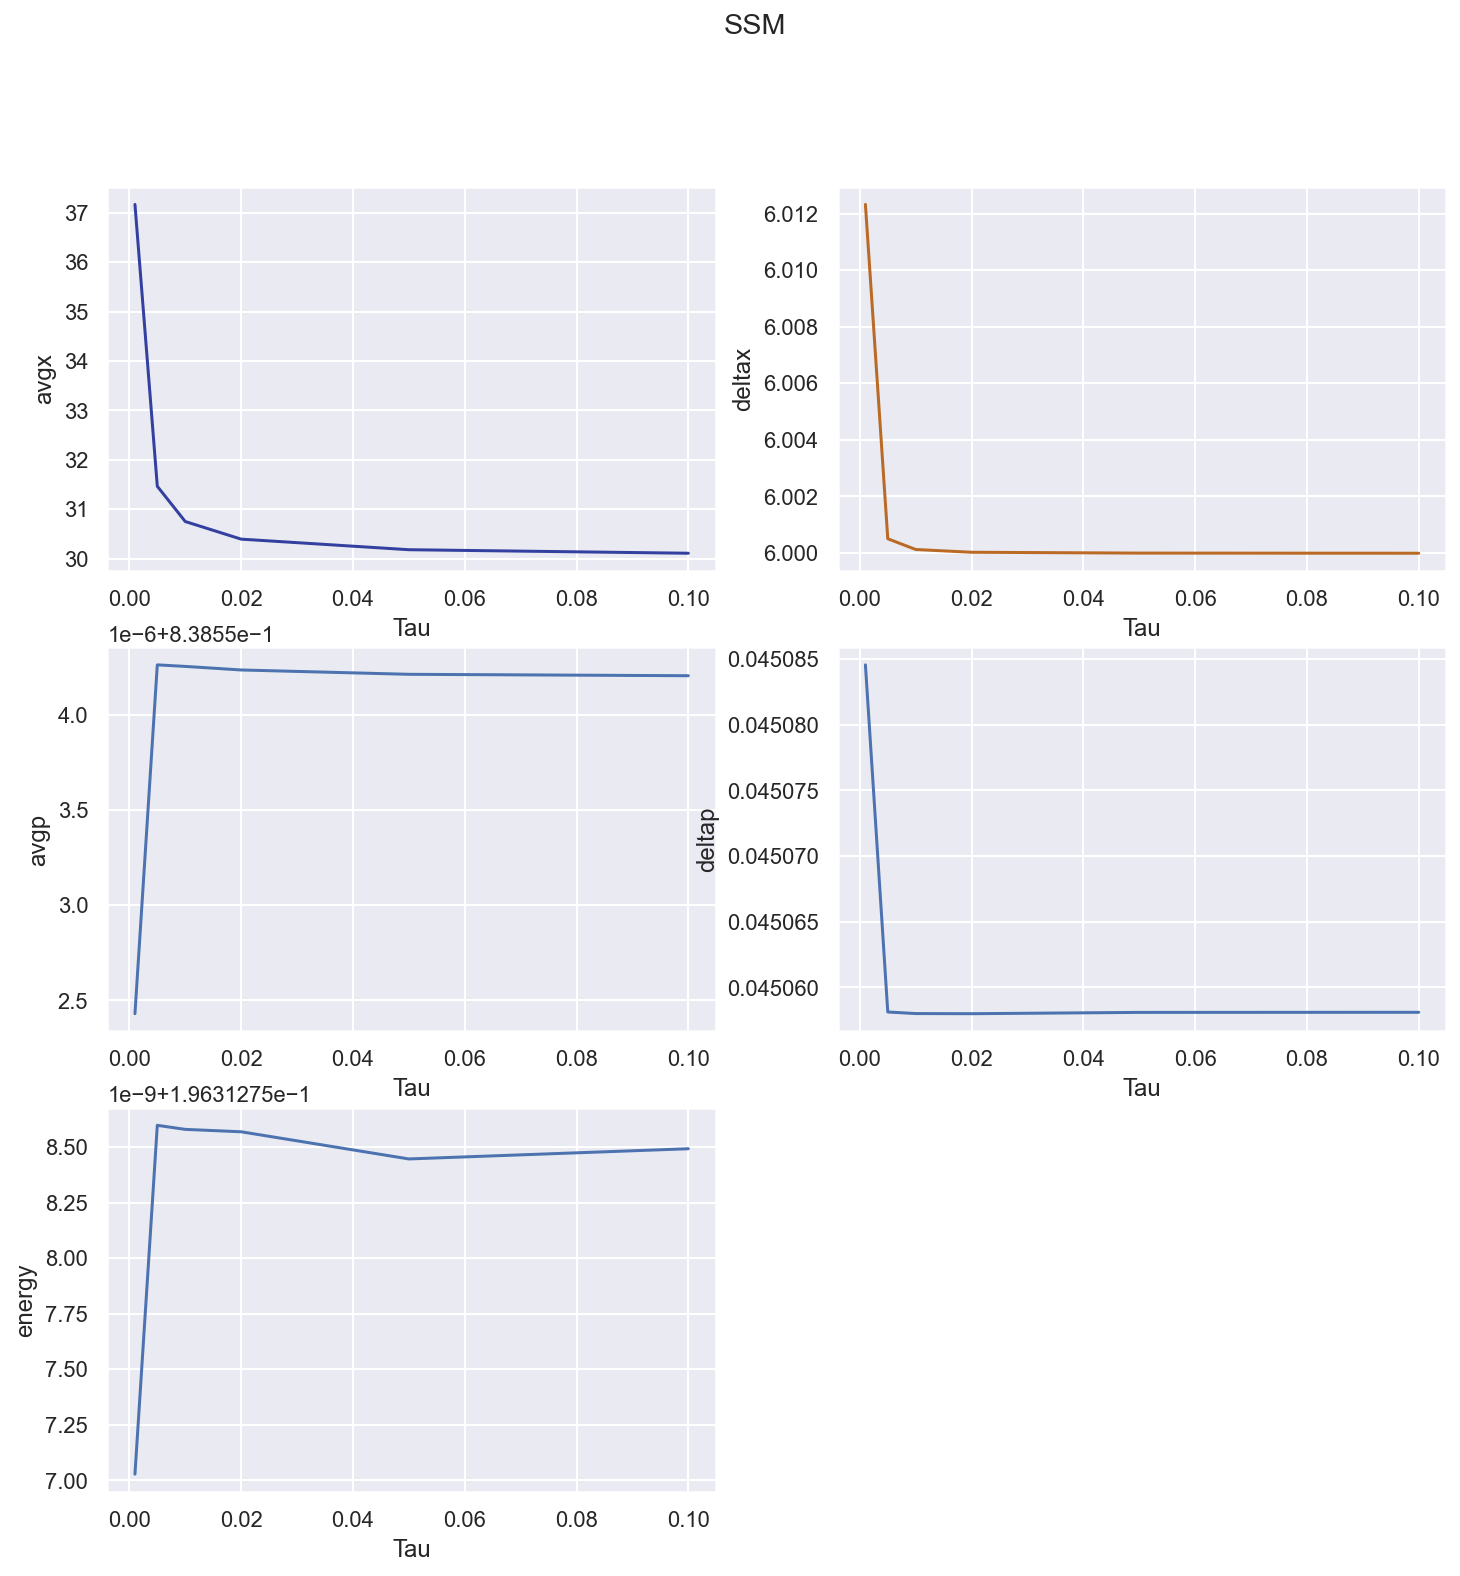

In [52]:
sns.set_theme()

fig = plt.figure(figsize=(12,12))
fig.suptitle('SSM')

ax1 = plt.subplot(321)
ax1.plot(ssm_obs_df.Tau[:], ssm_obs_df.averx[:], label='avgx', color='#3340a0')
ax1.set_xlabel('Tau')
ax1.set_ylabel('avgx')
# ax1.set_xscale('log')

ax2 = plt.subplot(322)
ax2.plot(ssm_obs_df.Tau, ssm_obs_df.deltax, label='deltax', color='#ba6a25')
ax2.set_xlabel('Tau')
ax2.set_ylabel('deltax')
# ax2.set_xscale('log')

ax3 = plt.subplot(323)
ax3.plot(ssm_obs_df.Tau, ssm_obs_df.averp, label='avgp')
ax3.set_xlabel('Tau')
ax3.set_ylabel('avgp')
# ax3.set_xscale('log')

ax4 = plt.subplot(324)
ax4.plot(ssm_obs_df.Tau, ssm_obs_df.deltap, label='deltap')
ax4.set_xlabel('Tau')
ax4.set_ylabel('deltap')
# ax4.set_xscale('log')


ax5 = plt.subplot(325)
ax5.plot(ssm_obs_df.Tau, ssm_obs_df.avg_state_energy, label='energy')
ax5.set_xlabel('Tau')
ax5.set_ylabel('energy')
# ax5.set_xscale('log')



# plt.savefig('conv.png', dpi=200)
plt.show()

### Trying to make it more consise

In [10]:
# list_of_dfs = [pd.read_csv("../data/gauss_wf_wall6_129_1_{}_2_3_30_6_1.txt".format(i), sep="\t") for i in nsteps]
# list_of_dfs[0].head()
# for df in list_of_dfs:
#     temp_df = pd.DataFrame(df.iloc[[-1]])
#     concat_df = pd.concat(temp_df)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

### Reading in data for UCM

In [43]:
count = False
for i in nsteps:
    df = pd.read_csv("../data/gauss_wf_wall6_129_1_{}_1_3_30_6_1.txt".format(i), sep="\t")

    temp_df = pd.DataFrame(df.iloc[[-1]])
    temp_df['nsteps'] = i

    if count == False:
        ucm_obs_df = pd.DataFrame(temp_df)
        count = True
    else:
        ucm_obs_df = pd.concat([ucm_obs_df, temp_df], ignore_index=True)
        
# Adding column with Tau used in that case (time = nsteps x Tau)
ucm_obs_df['Tau'] = 1/ucm_obs_df['nsteps']
ucm_obs_df



,tau,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,0.900,5.425198e-16,-1.082073e-16,31.597745,6.000571,0.838554,0.045058,0.196313,1.0,10,0.100
1,0.950,1.078489e-16,-5.101518e-16,33.372174,6.002585,0.838554,0.045059,0.196313,1.0,20,0.050
2,0.980,-2.380285e-15,1.030182e-15,38.695348,6.017179,0.838548,0.045155,0.196313,1.0,50,0.020
3,0.990,1.175699e-15,-2.208666e-16,47.562434,6.055196,0.836170,0.073813,0.196313,1.0,100,0.010
4,0.995,2.505613e-11,2.586468e-11,60.957287,3.781553,0.069921,0.808003,0.196313,1.0,200,0.005
5,0.999,-6.347244e-05,-2.249713e-05,55.307248,7.740986,-0.438665,0.701213,0.196313,1.0,1000,0.001


### Reading in data for Euler

In [5]:
nsteps_euler = [ 1000, 2000, 5000, 10000]
counte = False
for i in nsteps_euler:
    dfe = pd.read_csv("../data/gauss_wf_wall6_129_1_{}_0_3_30_6_1.txt".format(i), sep="\t")

    temp_dfe = pd.DataFrame(dfe.iloc[[-1]])
    temp_dfe['nsteps'] = i
    
    if counte == False:
        euler_obs_df = pd.DataFrame(temp_dfe)
        counte = True
    else:
        euler_obs_df = pd.concat([euler_obs_df, temp_dfe], ignore_index=True)

# Adding column with Tau used in that case (time = nsteps x Tau)
euler_obs_df['Tau'] = 1/euler_obs_df['nsteps']
# euler_obs_df

dfe.loc
dfe.head(-5)

,tau,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi)
0,0.0000,0.000498,0.000000,30.000006,5.999985,0.838554,0.045058,0.196313,1.0
1,0.0000,0.000405,0.000631,30.000006,5.999985,0.838554,0.045058,0.196313,1.0
2,0.0000,-0.000464,0.001013,30.000006,5.999985,0.838554,0.045058,0.196313,1.0
3,0.0000,-0.001616,0.000230,30.000006,5.999985,0.838554,0.045058,0.196313,1.0
4,0.0000,-0.001542,-0.001785,30.000006,5.999985,0.838554,0.045058,0.196313,1.0
...,...,...,...,...,...,...,...,...,...
1289990,0.9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289991,0.9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289992,0.9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289993,0.9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


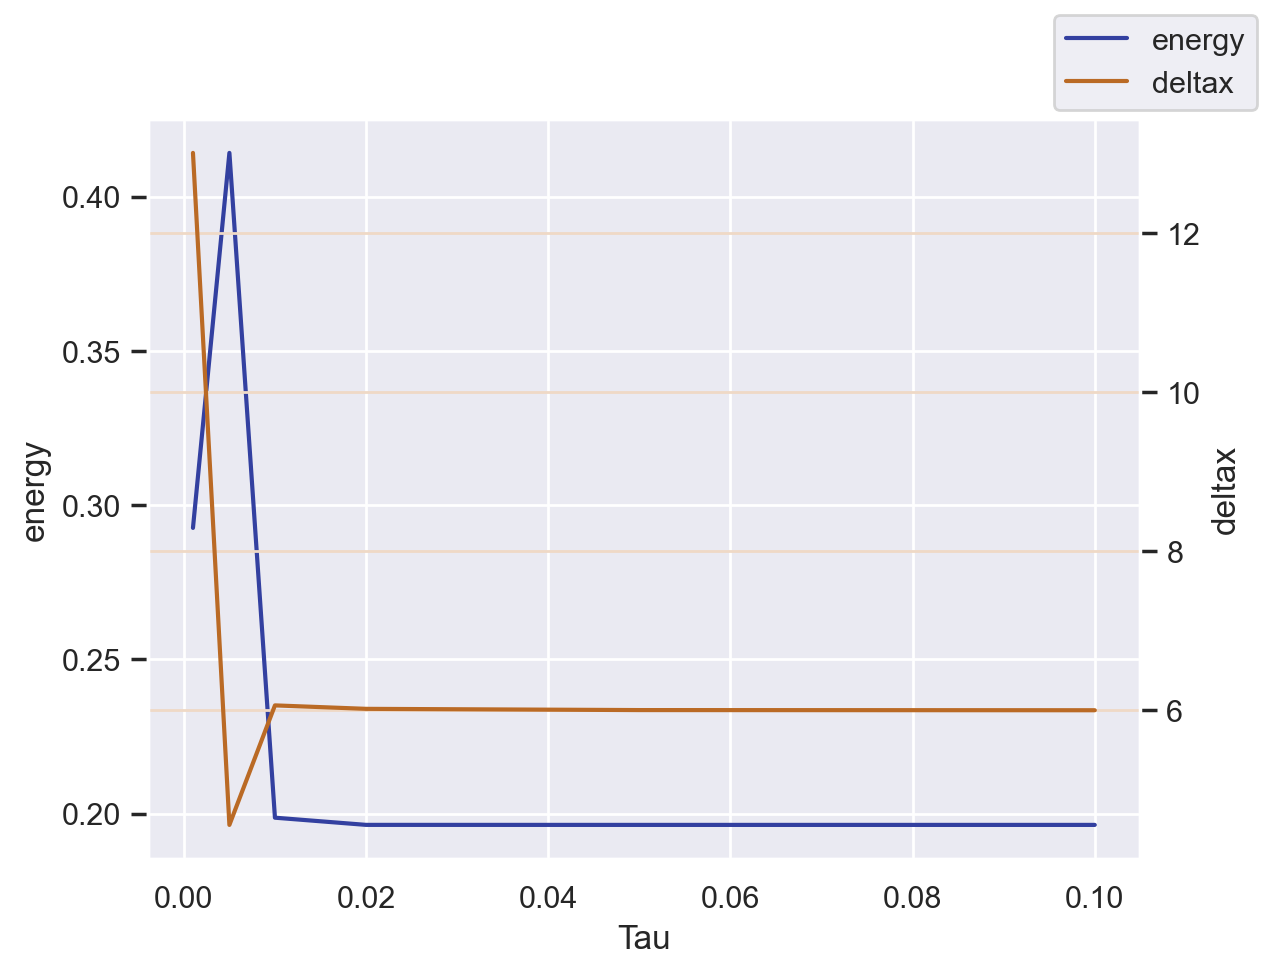

In [68]:
sns.set_theme()
# plt.style.use('default')

fig, ax1 = plt.subplots(1,1)


ax1.plot(obs_df.Tau[:], obs_df.avg_state_energy[:], label='energy', color='#3340a0')
ax1.set_xlabel('Tau')
ax1.set_ylabel('energy')
# ax1.set_yscale('log')

# ax1.set_xticks(obs_df.Tau[1:])
# ax1.grid()

ax2 = plt.twinx()

ax2.plot(obs_df.Tau, obs_df.deltax, label='deltax', color='#ba6a25')
ax2.set_ylabel('deltax')
ax2.grid(color='#efd9c6')


fig.legend()
plt.savefig('conv.png', dpi=200)
plt.show()

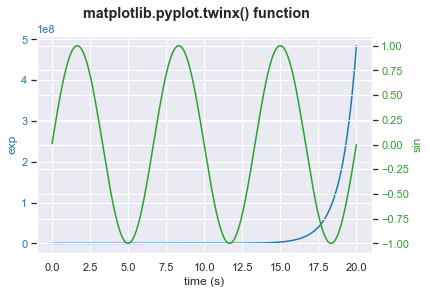

In [7]:
# Create some mock data 
t = np.arange(0.01, 20.0, 0.001) 
data1 = np.exp(t) 
data2 = np.sin(0.3 * np.pi * t) 
   
fig, ax1 = plt.subplots() 
   
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('exp', color = color) 
ax1.plot(t, data1, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
   
ax2 = ax1.twinx() 
   
color = 'tab:green'
ax2.set_ylabel('sin', color = color) 
ax2.plot(t, data2, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
  
fig.suptitle('matplotlib.pyplot.twinx() function ', fontweight ="bold") 

plt.show() 

In [59]:
x = np.array([0.003, 0.004, 0.005, 0.006])
y = x/60
y
steps = 1/y
steps


array([20000., 15000., 12000., 10000.])